# Подготовка

In [1]:
import sklearn.tree as tree
import sklearn.model_selection as skmodel
import sklearn.metrics as metrics
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear
import sklearn.neighbors as neighbors
import sklearn.model_selection as model
import xgboost as xgb
import imblearn.over_sampling as oversampling
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections as cl

In [2]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Win_Probability", axis=1)
Y_class = data_classification.loc[:, "Win_Probability"]
X_class, Y_class = oversampling.SMOTE().fit_resample(X_class, Y_class)
X_class.shape, Y_class.shape

((283935, 2), (283935,))

In [4]:
data_classification

,Character_1,Character_2,Win_Probability
0,558,11880,-1
1,4687,6887,-1
2,3954,6775,-1
3,1009,10302,0
4,6389,6454,-1
...,...,...,...
198672,6299,4460,-1
198673,1386,1917,-1
198674,572,4460,-1
198675,3010,4460,-1


In [5]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = skmodel.train_test_split(X_reg, Y_reg, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = skmodel.train_test_split(X_class, Y_class, random_state=14)

# Задание 1

In [6]:
tree_regression_model = tree.DecisionTreeRegressor(max_depth=5).fit(X_reg_train, Y_reg_train)

tree_regression_prediction = tree_regression_model.predict(X_reg_test)

In [7]:
print(metrics.mean_absolute_error(Y_reg_test, tree_regression_prediction),
      metrics.r2_score(Y_reg_test, tree_regression_prediction),
      sep="\n")

646.1498831943304
0.9130261302011216


In [8]:
print(tree.export_text(tree_regression_model))

|--- feature_0 <= 1.00
|   |--- feature_5 <= 5.54
|   |   |--- feature_5 <= 4.99
|   |   |   |--- feature_4 <= 4.62
|   |   |   |   |--- feature_4 <= 4.30
|   |   |   |   |   |--- value: [579.36]
|   |   |   |   |--- feature_4 >  4.30
|   |   |   |   |   |--- value: [740.70]
|   |   |   |--- feature_4 >  4.62
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- value: [939.55]
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- value: [1194.64]
|   |   |--- feature_5 >  4.99
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- value: [1869.18]
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- value: [1441.46]
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_0 <= 0.64
|   |   |   |   |   |--- value: [1185.74]
|   |   |   |   |--- feature_0 >  0.64
|   |   |   |   |   |--- value: [1877.07]
|   |--- feature_5 >  5.54
|   |   |--- feature_0 <= 0.88
|   |   |   |--- feature_5 <= 5.72
|   

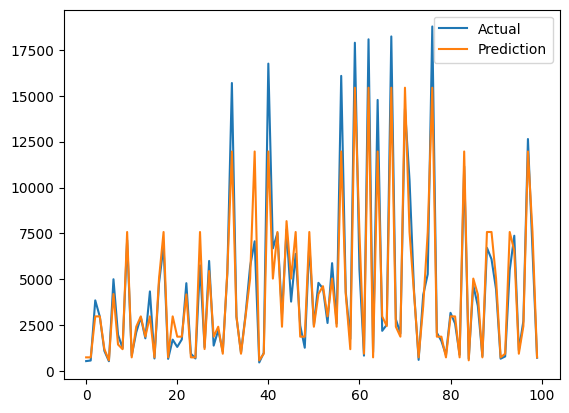

In [9]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(tree_regression_prediction[:100], label="Prediction");
plt.legend();

In [10]:
tree_classification_model = tree.DecisionTreeClassifier().fit(X_class_train, Y_class_train)

tree_classification_prediction = tree_classification_model.predict(X_class_test)

In [11]:
print(metrics.classification_report(Y_class_test.to_numpy(), tree_classification_prediction))

              precision    recall  f1-score   support

          -1       0.81      0.83      0.82     23849
           0       0.88      0.84      0.86     23611
           1       0.81      0.83      0.82     23524

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



In [12]:
print(tree.export_text(tree_classification_model))

|--- feature_1 <= 8263.50
|   |--- feature_0 <= 12029.50
|   |   |--- feature_0 <= 11879.50
|   |   |   |--- feature_0 <= 1410.50
|   |   |   |   |--- feature_0 <= 1304.50
|   |   |   |   |   |--- feature_1 <= 8127.00
|   |   |   |   |   |   |--- feature_1 <= 5098.50
|   |   |   |   |   |   |   |--- feature_0 <= 1281.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 772.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 558.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 557.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  557.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |--- feature_0 >  558.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 563.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  563.50
|   | 

# Задание 2

## Bagging

In [13]:
bagging_regression_model = ensemble.BaggingRegressor().fit(X_reg_train, Y_reg_train)

bagging_regression_prediction = bagging_regression_model.predict(X_reg_test)

In [14]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

290.7119309108886
0.978241452587227


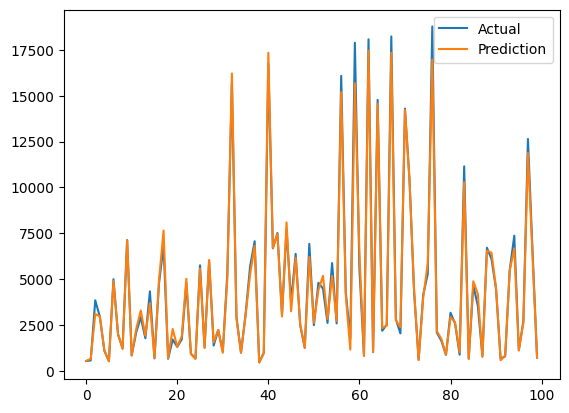

In [15]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [16]:
bagging_classification_model = ensemble.BaggingClassifier().fit(X_class_train, Y_class_train)

bagging_classification_prediction = bagging_classification_model.predict(X_class_test)

In [17]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.83      0.82     23849
           0       0.88      0.87      0.88     23611
           1       0.82      0.81      0.82     23524

    accuracy                           0.84     70984
   macro avg       0.84      0.84      0.84     70984
weighted avg       0.84      0.84      0.84     70984



## Boosting

In [18]:
boosting_regression_model = ensemble.GradientBoostingRegressor().fit(X_reg_train, Y_reg_train)

boosting_regression_prediction = boosting_regression_model.predict(X_reg_test)

In [19]:
print(metrics.mean_absolute_error(Y_reg_test, boosting_regression_prediction),
      metrics.r2_score(Y_reg_test, boosting_regression_prediction),
      sep="\n")

408.3780638558192
0.9659062218459845


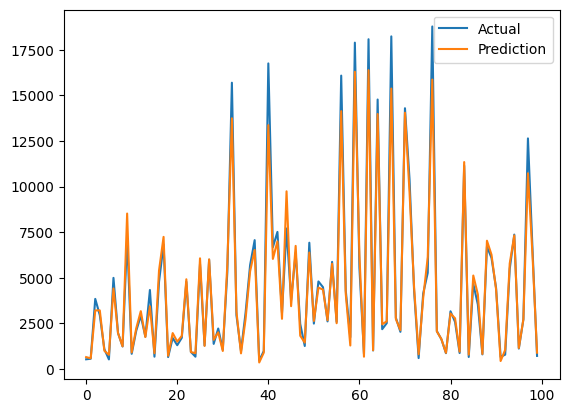

In [20]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(boosting_regression_prediction[:100], label="Prediction");
plt.legend();

In [21]:
boosting_classification_model = ensemble.GradientBoostingClassifier().fit(X_class_train, Y_class_train)

boosting_classification_prediction = boosting_classification_model.predict(X_class_test)

In [22]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.83      0.82     23849
           0       0.88      0.87      0.88     23611
           1       0.82      0.81      0.82     23524

    accuracy                           0.84     70984
   macro avg       0.84      0.84      0.84     70984
weighted avg       0.84      0.84      0.84     70984



## Stacking

In [23]:
stacking_regression_model = ensemble.StackingRegressor(cv=3, estimators=[("ridge", linear.RidgeCV()), ("tree", tree.DecisionTreeRegressor())]).fit(X_reg_train, Y_reg_train)

stacking_regression_prediction = stacking_regression_model.predict(X_reg_test)

In [24]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

290.7119309108886
0.978241452587227


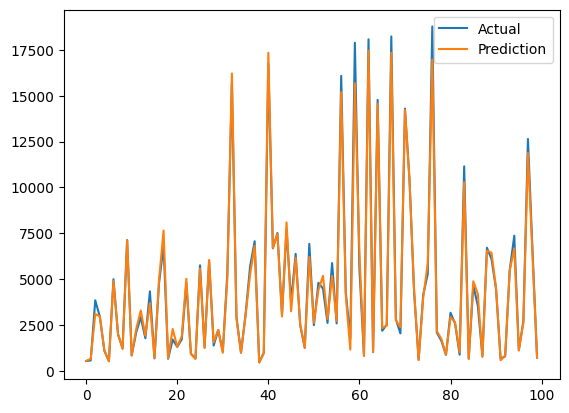

In [25]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [26]:
stacking_classification_model = ensemble.StackingClassifier(cv=3, estimators=[("neighbors", neighbors.KNeighborsClassifier(weights="distance")), ("tree", tree.DecisionTreeClassifier())]).fit(X_class_train, Y_class_train)

stacking_classification_prediction = stacking_classification_model.predict(X_class_test)

In [27]:
print(metrics.classification_report(Y_class_test, stacking_classification_prediction))

              precision    recall  f1-score   support

          -1       0.83      0.84      0.83     23849
           0       0.90      0.89      0.89     23611
           1       0.83      0.83      0.83     23524

    accuracy                           0.85     70984
   macro avg       0.85      0.85      0.85     70984
weighted avg       0.85      0.85      0.85     70984



# Задание 3

In [28]:
tree_method: str = {"0": "hist", "1": "gpu_hist"}.get(input())
xgb_regression_model = model.RandomizedSearchCV(xgb.XGBRegressor(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_reg_train, Y_reg_train)

xgb_regression_prediction = xgb_regression_model.predict(X_reg_test)
xgb_regression_model.best_params_

{'tree_method': 'hist', 'n_estimators': 80, 'max_depth': 8}

In [29]:
print(metrics.mean_absolute_error(Y_reg_test, xgb_regression_prediction),
      metrics.r2_score(Y_reg_test, xgb_regression_prediction),
      sep="\n")

289.55787842340015
0.9784038700107824


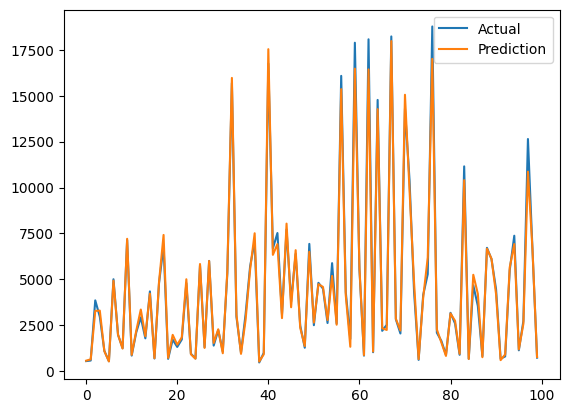

In [30]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(xgb_regression_prediction[:100], label="Prediction");
plt.legend();

In [31]:
Y_class_train_relabeled = Y_class_train.apply(lambda x: x + 1)
xgb_classification_model = model.RandomizedSearchCV(xgb.XGBClassifier(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_class_train, Y_class_train_relabeled)

xgb_classification_prediction = xgb_classification_model.predict(X_class_test)
xgb_classification_model.best_params_

{'tree_method': 'hist', 'n_estimators': 90, 'max_depth': 19}

In [32]:
print(metrics.classification_report(Y_class_test, xgb_classification_prediction - 1))

              precision    recall  f1-score   support

          -1       0.63      0.59      0.61     23849
           0       0.71      0.81      0.75     23611
           1       0.62      0.58      0.60     23524

    accuracy                           0.66     70984
   macro avg       0.65      0.66      0.65     70984
weighted avg       0.65      0.66      0.65     70984



In [33]:
matrix_train = xgb.DMatrix(X_class_train, Y_class_train_relabeled)
matrix_test = xgb.DMatrix(X_class_test, Y_class_test.apply(lambda x: x + 1))

iterations: int = 8000 if tree_method == "gpu_hist" else 800
matrix_booster = xgb.train({"objective": "multi:softmax", "num_class": 3, "tree_method": tree_method}, matrix_train, iterations, evals=[(matrix_test, "test")])

[0]	test-mlogloss:1.09627
[1]	test-mlogloss:1.09420
[2]	test-mlogloss:1.09276
[3]	test-mlogloss:1.09129
[4]	test-mlogloss:1.08993
[5]	test-mlogloss:1.08877
[6]	test-mlogloss:1.08750
[7]	test-mlogloss:1.08633
[8]	test-mlogloss:1.08519
[9]	test-mlogloss:1.08388
[10]	test-mlogloss:1.08291
[11]	test-mlogloss:1.08173
[12]	test-mlogloss:1.08074
[13]	test-mlogloss:1.07977
[14]	test-mlogloss:1.07867
[15]	test-mlogloss:1.07778
[16]	test-mlogloss:1.07681
[17]	test-mlogloss:1.07596
[18]	test-mlogloss:1.07503
[19]	test-mlogloss:1.07433
[20]	test-mlogloss:1.07341
[21]	test-mlogloss:1.07288
[22]	test-mlogloss:1.07220
[23]	test-mlogloss:1.07129
[24]	test-mlogloss:1.07052
[25]	test-mlogloss:1.07002
[26]	test-mlogloss:1.06924
[27]	test-mlogloss:1.06848
[28]	test-mlogloss:1.06769
[29]	test-mlogloss:1.06690
[30]	test-mlogloss:1.06641
[31]	test-mlogloss:1.06596
[32]	test-mlogloss:1.06517
[33]	test-mlogloss:1.06449
[34]	test-mlogloss:1.06356
[35]	test-mlogloss:1.06299
[36]	test-mlogloss:1.06247
[37]	test-m

In [34]:
matrix_prediction = matrix_booster.predict(matrix_test)

print(metrics.classification_report(Y_class_test, matrix_prediction - 1))

              precision    recall  f1-score   support

          -1       0.56      0.52      0.54     23849
           0       0.63      0.71      0.67     23611
           1       0.55      0.51      0.53     23524

    accuracy                           0.58     70984
   macro avg       0.58      0.58      0.58     70984
weighted avg       0.58      0.58      0.58     70984



In [65]:
from typing import SupportsIndex, Union, Hashable, Callable, Optional, Literal
from typing_extensions import Self
from abc import abstractmethod, ABCMeta # for interfaces

class Branching:
    '''Just a structure to get info about next nodes'''
    def __init__(self, split_index: int, split_value: float, children: dict[bool, "_TreeNode"]) -> None:
        self.split_index = split_index
        self.split_value = split_value
        self.children = children

class _TreeNode(metaclass=ABCMeta):
    '''Decision tree node interface'''
    @abstractmethod
    def next(self) -> Union[Hashable, Branching]:
        raise NotImplementedError

class _TreeLeaf(_TreeNode):
    def __init__(self, value: Optional[Hashable] = None) -> None:
        self.value = value
    
    def next(self) -> Hashable:
        return self.value

class _TreeBranch(_TreeNode):
    def __init__(
            self,
            split_index: int,
            split_value: float,
            children: dict[bool, Optional[_TreeNode]]
        ) -> None:
        self.split_index = split_index
        self.split_value = split_value
        self.children = children

    def next(self) -> Branching:
        return Branching(self.split_index, self.split_value, self.children)

class _DecisionTree(metaclass=ABCMeta):
    def __init__(self, max_depth: Optional[int] = None, min_samples: int = 3) -> None:
        self.max_depth = max_depth
        self.min_features = min_samples
    
    @abstractmethod
    def _best_value(self, Y: np.ndarray) -> Hashable:
        raise NotImplementedError
    
    @abstractmethod
    def _error(self, value: float, X: np.ndarray, Y: np.ndarray) -> float:
        raise NotImplementedError

    def _best_split(self, X: np.ndarray, Y: np.ndarray) -> tuple[int, Hashable]:
        least_loss: float = -1
        for index in range(X.shape[1]):
            column = X.T[index]
            values = np.unique(column)
            for value in values[1:]: # useless feature selection workaround
                error = self._error(value, column, Y)
                if error < least_loss or least_loss == -1:
                    least_loss = error
                    best_feature_index = index
                    best_split_value = value
        result = (best_feature_index, best_split_value)
        return result
    
    def _create_nodes(self, depth: int, X: np.ndarray, Y: np.ndarray) -> _TreeNode:
        split_index, split_value = self._best_split(X, Y)
        split = X.T[split_index] >= split_value
        children = dict(((False, None), (True, None)))
        for key in children.keys():
            Y_slice: np.ndarray = Y[np.argwhere(split == key)].reshape(-1)
            if Y_slice.shape[0] == 0:
                best_value = self._best_value(Y)
                return _TreeLeaf(best_value)
            elif Y_slice.shape[0] < self.min_features or depth == self.max_depth or np.unique(Y_slice).shape[0] == 1:
                # create leaf node
                best_value = self._best_value(Y_slice)
                children[key] = _TreeLeaf(best_value)
            else:
                # create branch node
                X_slice = X[np.argwhere(split == key)].reshape(-1, X.shape[1])
                children[key] = self._create_nodes(depth + 1, X_slice, Y_slice)
        return _TreeBranch(split_index, split_value, children)
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> Self:
        Y = Y.reshape(-1)
        self.root_node: _TreeBranch = self._create_nodes(0, X, Y)
        return self

    def _search(self, X: np.ndarray, node: _TreeNode) -> Hashable:
        node_value = node.next()
        if isinstance(node_value, Branching):
            key = X[node_value.split_index] >= node_value.split_value
            return self._search(X, node_value.children[key])
        else:
            return node_value
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        result = np.empty((X.shape[0], 1))
        for i in range(result.shape[0]):
            result[i] = self._search(X[i], self.root_node)
        return result

    def _node_visualization(self, node: _TreeNode, depth: int) -> None:
        if isinstance(node, _TreeBranch):
            print("-|" * (depth + 1), f"feature {node.split_index} >= {node.split_value}")
            for next_node in node.children.values():
                self._node_visualization(next_node, depth + 1)
        else:
            print("-|" * (depth + 1) + "--*", node.value)

    def tree_visualization(self) -> None:
        self._node_visualization(self.root_node, 0)

class DecisionTreeRegressor(_DecisionTree):
    def _best_value(self, Y: np.ndarray) -> float:
        value = np.mean(Y)
        return value
    
    def _error(self, value: float, X: np.ndarray, Y: np.ndarray) -> float: # MSE
        Y_split = Y[np.argwhere(X == value)].mean()
        #fine = 0.
        # split_ratio = Y[np.argwhere(X >= value)].shape[0] / Y.shape[0]
        #if Y[np.argwhere(X >= value)].shape[0] == Y.shape[0]:
        #    fine = Y.max() - Y.min()
        error = np.sum(np.subtract(Y, Y_split)**2) / Y.shape[0]# + fine
        return error
    
    def _best_split(self, X: np.ndarray, Y: np.ndarray) -> tuple[int, float]:
        return super()._best_split(X, Y)
    
    def _search(self, X: np.ndarray, node: _TreeNode) -> float:
        return super()._search(X, node)

class DecisionTreeClassifier(_DecisionTree):
    def _best_value(self, Y: np.ndarray) -> Hashable:
        counter = cl.Counter()
        for value in Y:
            counter.update([value])
        return counter.most_common(1)[0][0]
    
    def _entropy(self, Y: np.ndarray) -> float:
        Y = Y.reshape((-1))
        print(Y.shape)
        probabilities = np.bincount(Y) / Y.shape[0]
        return -np.sum([value * np.log(value) for value in probabilities if value > 0])

    def _error(self, value: float, X: np.ndarray, Y: np.ndarray) -> float:
        parent_entropy = self._entropy(Y)

        left_part = np.argwhere(X < value)
        right_part = np.argwhere(X >= value)
        Y_length = Y.shape[0]
        left_part_length = left_part.shape[0]
        right_part_length = right_part.shape[0]
        left_entropy = self._entropy(Y[left_part])
        right_entropy = self._entropy(Y[right_part])

        child_entropy = left_part_length / Y_length * left_entropy + right_part_length / Y_length * right_entropy
        return parent_entropy - child_entropy

In [39]:
tree_regression_model_ = DecisionTreeRegressor(10, 5)
tree_regression_model_.fit(X_reg_train.to_numpy(), Y_reg_train.to_numpy())

In [40]:
tree_regression_prediction_ = tree_regression_model_.predict(X_reg_test.to_numpy())
print(tree_regression_prediction_)

[[  729.5       ]
 [  564.75      ]
 [ 2835.15384615]
 ...
 [ 9689.15517241]
 [11802.45283019]
 [ 5537.24617197]]


In [41]:
tree_regression_model_.tree_visualization()

-| feature 19 >= 1.0
-|-| feature 3 >= 57.0
-|-|-| feature 6 >= 3.71
-|-|-|-| feature 2 >= 66.3
-|-|-|-|-| feature 2 >= 61.3
-|-|-|-|-|-| feature 4 >= 4.95
-|-|-|-|-|-|-| feature 5 >= 4.58
-|-|-|-|-|-|-|-| feature 5 >= 4.44
-|-|-|-|-|-|-|-|-| feature 4 >= 4.49
-|-|-|-|-|-|-|-|-|-| feature 2 >= 60.3
-|-|-|-|-|-|-|-|-|-|-| feature 20 >= 1.0
-|-|-|-|-|-|-|-|-|-|-|-|--* 610.0384615384615
-|-|-|-|-|-|-|-|-|-|-|-|--* 609.4
-|-|-|-|-|-|-|-|-|-|-| feature 2 >= 60.5
-|-|-|-|-|-|-|-|-|-|-|-|--* 812.1111111111111
-|-|-|-|-|-|-|-|-|-|-|-|--* 745.09375
-|-|-|-|-|-|-|-|-|-|--* 732.0
-|-|-|-|-|-|-|-|-| feature 10 >= 1.0
-|-|-|-|-|-|-|-|-|-| feature 18 >= 1.0
-|-|-|-|-|-|-|-|-|-|-| feature 6 >= 2.71
-|-|-|-|-|-|-|-|-|-|-|-|--* 750.3333333333334
-|-|-|-|-|-|-|-|-|-|-|-|--* 806.9268292682926
-|-|-|-|-|-|-|-|-|-|-| feature 1 >= 5.0
-|-|-|-|-|-|-|-|-|-|-|-|--* 805.3333333333334
-|-|-|-|-|-|-|-|-|-|-|-|--* 797.6451612903226
-|-|-|-|-|-|-|-|-|-| feature 3 >= 56.0
-|-|-|-|-|-|-|-|-|-|-| feature 6 >= 2.71
-|-

In [42]:
metrics.r2_score(Y_reg_test, tree_regression_prediction_)

0.84016566204108

In [66]:
tree_classification_model_ = DecisionTreeClassifier(1, 20)
tree_classification_model_.fit(X_class_train.to_numpy(), Y_class_train.to_numpy() + 1)

(212951,)
(6,)
(212945,)
(212951,)
(65,)
(212886,)
(212951,)
(71,)
(212880,)
(212951,)
(113,)
(212838,)
(212951,)
(114,)
(212837,)
(212951,)
(115,)
(212836,)
(212951,)
(153,)
(212798,)
(212951,)
(157,)
(212794,)
(212951,)
(162,)
(212789,)
(212951,)
(166,)
(212785,)
(212951,)
(196,)
(212755,)
(212951,)
(198,)
(212753,)
(212951,)
(202,)
(212749,)
(212951,)
(203,)
(212748,)
(212951,)
(208,)
(212743,)
(212951,)
(211,)
(212740,)
(212951,)
(219,)
(212732,)
(212951,)
(220,)
(212731,)
(212951,)
(223,)
(212728,)
(212951,)
(225,)
(212726,)
(212951,)
(229,)
(212722,)
(212951,)
(239,)
(212712,)
(212951,)
(247,)
(212704,)
(212951,)
(248,)
(212703,)
(212951,)
(250,)
(212701,)
(212951,)
(251,)
(212700,)
(212951,)
(255,)
(212696,)
(212951,)
(263,)
(212688,)
(212951,)
(266,)
(212685,)
(212951,)
(270,)
(212681,)
(212951,)
(272,)
(212679,)
(212951,)
(279,)
(212672,)
(212951,)
(301,)
(212650,)
(212951,)
(304,)
(212647,)
(212951,)
(309,)
(212642,)
(212951,)
(316,)
(212635,)
(212951,)
(329,)
(212622,)
(2129

In [67]:
tree_classification_prediction_ = tree_classification_model_.predict(X_class_test.to_numpy())
print(tree_classification_prediction_)

[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [2.]
 [2.]]


In [68]:
tree_classification_model_.tree_visualization()

-| feature 1 >= 11664
-|-| feature 1 >= 777
-|-|-|--* 2
-|-|-|--* 2
-|-| feature 0 >= 10286
-|-|-|--* 1
-|-|-|--* 1


In [71]:
print(metrics.classification_report(Y_class_test + 1, tree_classification_prediction_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23849
           1       0.32      0.04      0.07     23611
           2       0.33      0.96      0.49     23524

    accuracy                           0.33     70984
   macro avg       0.22      0.33      0.19     70984
weighted avg       0.22      0.33      0.19     70984



/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av